In [2]:
import pandas as pd


In [3]:
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
seeds_df = pd.read_csv(SEEDS_DATA_URL,sep=r"\s+",header=None)

In [7]:
seeds_df.head()
seeds_df.sample(10)

,0,1,2,3,4,5,6,7
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,3
163,12.55,13.57,0.8558,5.333,2.968,4.419,5.176,3
107,17.63,15.86,0.8800,6.033,3.573,3.747,5.929,2
133,16.16,15.33,0.8644,5.845,3.395,4.266,5.795,2
35,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1
62,12.36,13.19,0.8923,5.076,3.042,3.220,4.605,1
187,10.91,12.80,0.8372,5.088,2.675,4.179,4.956,3
66,14.34,14.37,0.8726,5.630,3.190,1.313,5.150,1
101,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2
83,19.57,16.74,0.8779,6.384,3.772,1.472,6.273,2


In [17]:
seeds_df.describe()


,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LinearRegression

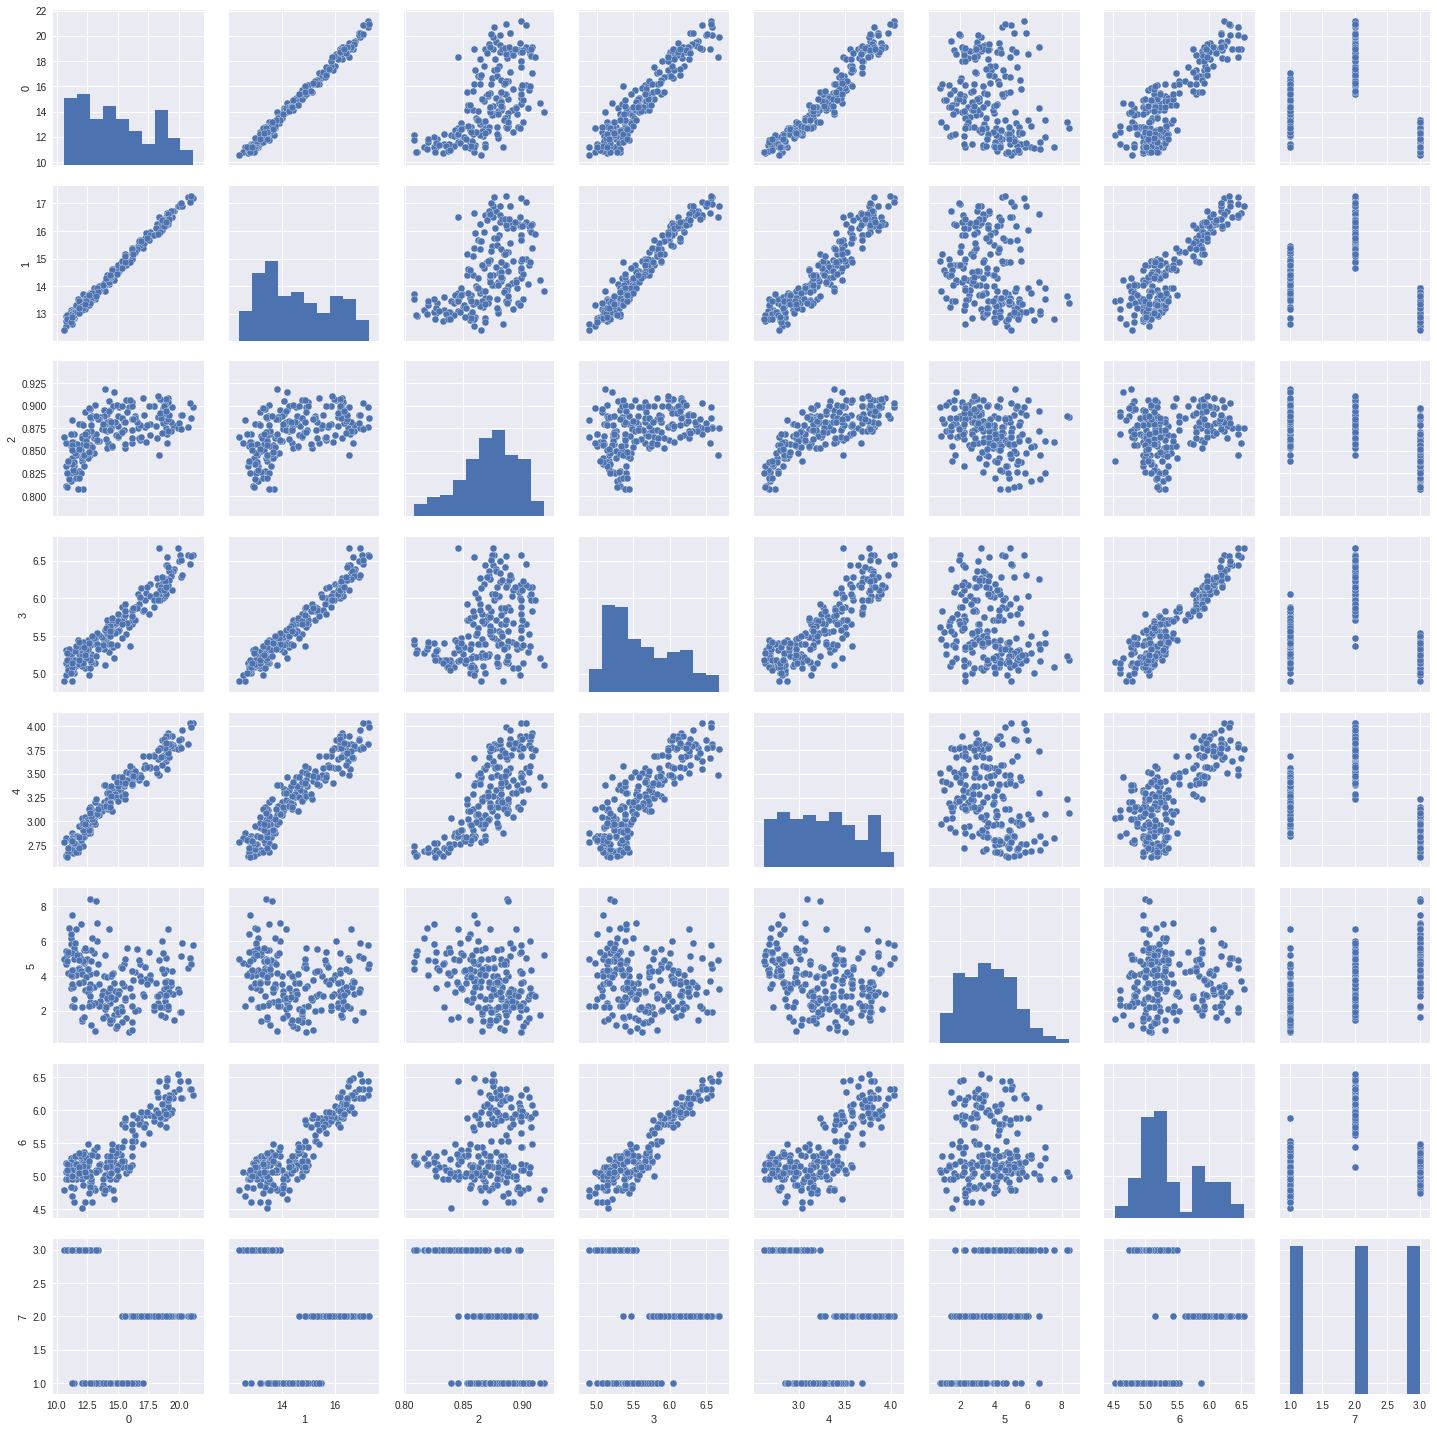

In [4]:
sns.pairplot(seeds_df)

In [7]:
#plot linear regression
#linear_regression_model = LinearRegression(fit_intercept=False)
#linear_regression_model.fit(features, target)

linear_regression_model.coef_

plt.figure(1, (20,5))

sns.regplot('x', 'y', data=seeds_df)

predictions = linear_regression_model.predict(features)
plt.scatter(seeds_df.petal_length, predictions, marker='x', color='red')


AttributeError: 'LinearRegression' object has no attribute 'coef_'